In [26]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import nltk
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
import json
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

these are the data sources that I want to use to create the app in the future. 

https://developer.yummly.com, https://developer.nutritionix.com/, https://www.gov.uk/government/publications/composition-of-foods-integrated-dataset-cofid, https://www.kaggle.com/c/whats-cooking/data

In [9]:
file = 'train.json'
with open(file) as train_file:
    dict_train = json.load(train_file)

In [11]:
train = pd.DataFrame.from_dict(dict_train)
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [22]:
cuisine_dict = {}
for cui in train.cuisine.unique():
    df_temp = train.loc[train.cuisine == cui]
    ingre = []
    for ing in  df_temp.ingredients: 
        ingre.extend(ing)
    ingre2 = ' '.join(str(e) for e in ingre)
    cuisine_dict.update({cui:ingre2})
    

In [24]:
# cuisine_dict

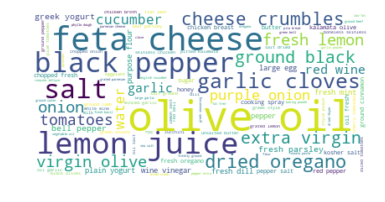

In [27]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cuisine_dict['greek'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

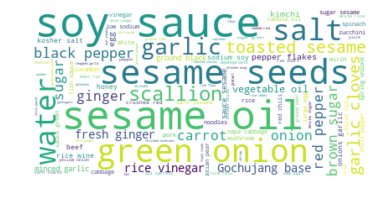

In [28]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cuisine_dict['korean'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

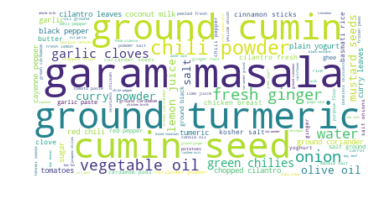

In [29]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cuisine_dict['indian'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:

def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [39]:
get_cosine_sim(cuisine_dict['chinese'],cuisine_dict['korean'])

array([[1.        , 0.89475559],
       [0.89475559, 1.        ]])

In [40]:
get_cosine_sim(cuisine_dict['italian'],cuisine_dict['korean'])

array([[1.        , 0.54340845],
       [0.54340845, 1.        ]])

In [41]:
def get_sim(x,y):
    return get_cosine_sim(cuisine_dict[x],cuisine_dict[y])[0][1]

In [42]:
x = train.cuisine.unique()
y = train.cuisine.unique()

whole = []
for i in x:
    temp = []
    for j in y:
        temp.append(get_sim(i,j))
    whole.append(temp)
        

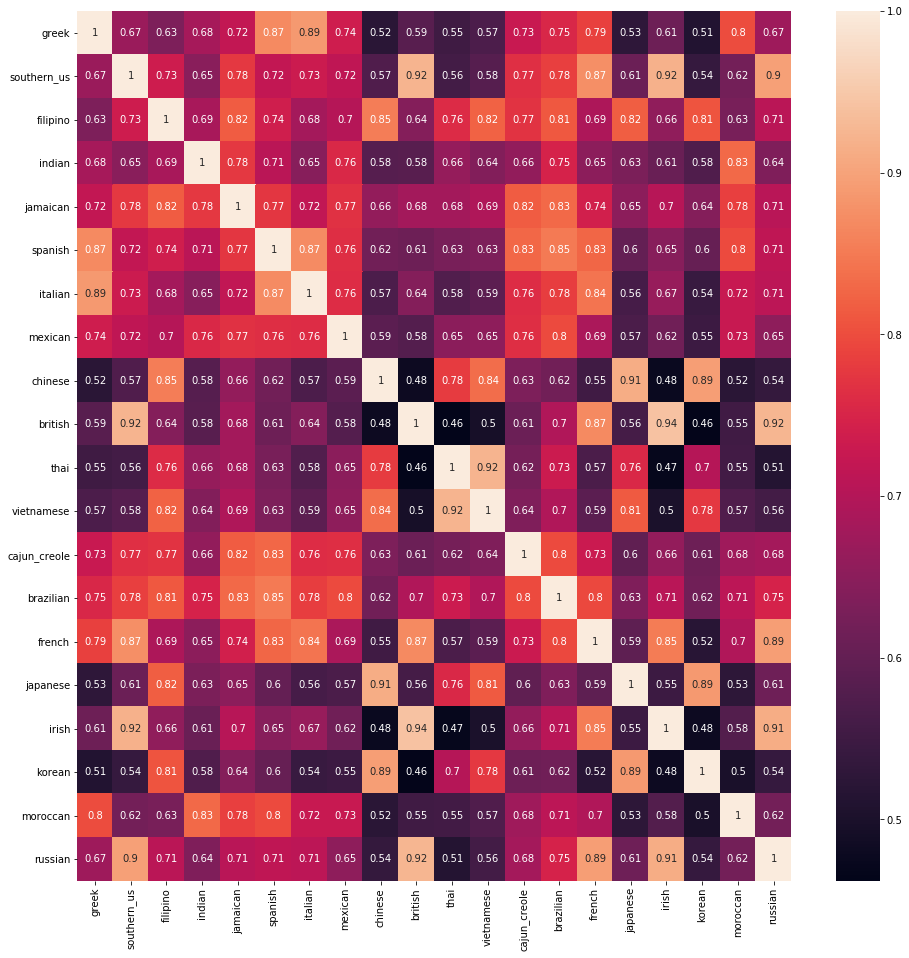

In [47]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (16,16))
Index= train.cuisine.unique()
Cols =  train.cuisine.unique()
df = DataFrame(whole, index=Index, columns=Cols)

sns.heatmap(df, annot=True)